In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [5]:
# import data
iris = datasets.load_iris()

In [7]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [9]:
IsSetosa = (iris.target==0)
print("Portion of Setosa: ", IsSetosa.sum()/len(IsSetosa))

Portion of Setosa:  0.3333333333333333


In [13]:
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['target'] = IsSetosa
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,True
1,4.9,3.0,1.4,0.2,True
2,4.7,3.2,1.3,0.2,True
3,4.6,3.1,1.5,0.2,True
4,5.0,3.6,1.4,0.2,True


In [15]:
# split data into training and testing set
train, test = train_test_split(df, test_size = 0.1, random_state = 0)
print('Size of train dataset: ', train.shape)
print('Size of test dataset: ', test.shape)

Size of train dataset:  (135, 5)
Size of test dataset:  (15, 5)


In [17]:
# let x in the training set be the variables without target
# let y in the training set be target
x_train = train.iloc[:, :2]
y_train = train['target']

# let x in the testing set be the variables without target
# let y in the testing set be target
x_test = test.iloc[:, :2]
y_test = test['target']

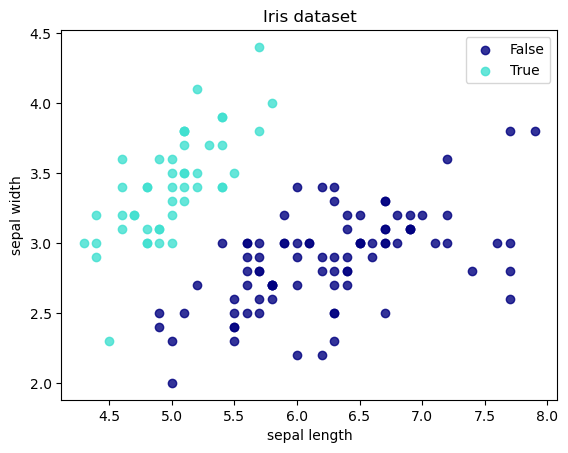

In [19]:
plt.figure()
colors = ['navy', 'turquoise']
for color, i, target_name in zip(colors, [0,1], np.unique(y_train)):
    plt.scatter(x_train.iloc[:, 0][y_train == i], x_train.iloc[:, 1][y_train == i], alpha=.8, color=color, label=target_name)

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.title('Iris dataset')
plt.show()

In [37]:
# train hard-margin/soft-margin SVM classifier using training dataset

# fit soft-margin linear svm to training variables and labels
lin_soft_svc = svm.LinearSVC(C = 1e-5).fit(x_train, y_train)

# fit soft-margin linear svm to training variables and labels
lin_soft_svc_ = svm.LinearSVC(C = 100).fit(x_train, y_train)

# fit hard-margin linear svm to training variables and labels with regularization
lin_hard_svc = svm.LinearSVC(C = 8000).fit(x_train, y_train)

/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [39]:
# visualize results

# titles for plots
titles = ['Linear soft-margin SVM (C~0)',
          'Linear soft-margin SVM (C=100)',
          'Linear hard-margin SVM (C=8000)']

In [41]:
h = 0.02
# create a mesh to plot in
x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"
/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"
/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


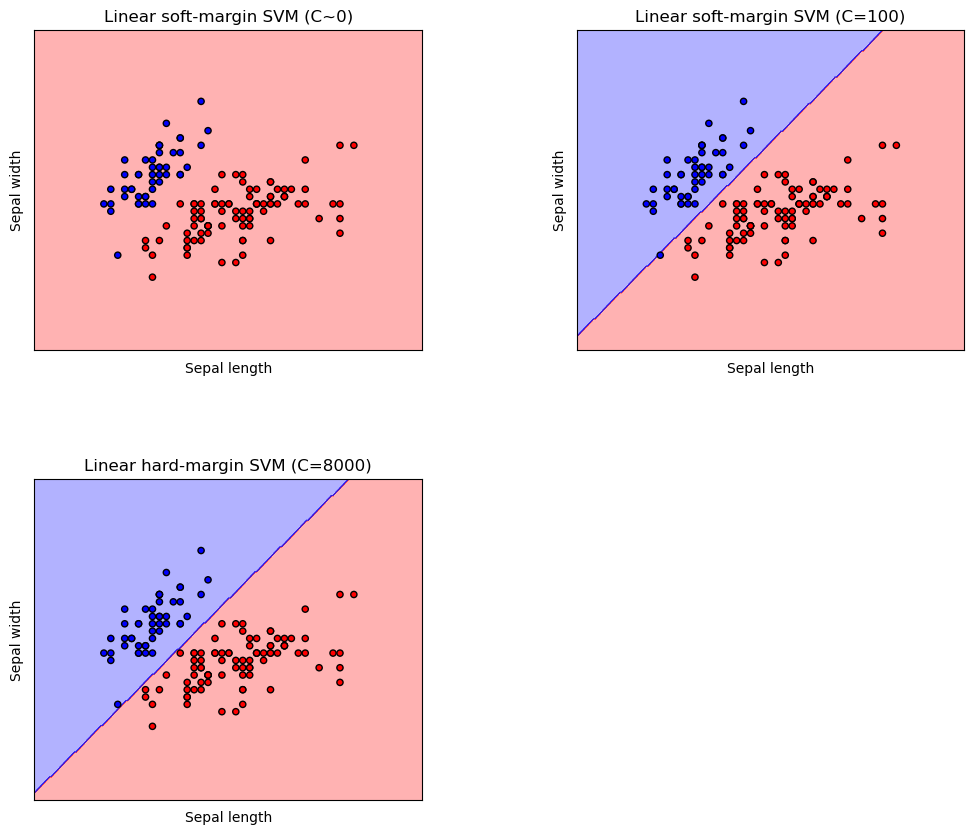

In [45]:
plt.figure(figsize = (12, 10))
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

for i, model in enumerate((lin_soft_svc, lin_soft_svc_, lin_hard_svc)):
    # plot decision boundary
    # assign a color to each point in the mesh 
    # [x_min, m_max]x[y_min, y_max]
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # put result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_bold, alpha=0.3)

    # plot training points
    plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, cmap=cmap_bold, edgecolor = 'k', s=20)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [ ]:
# interpretation of above figures
# when C is small, some misclassification is allowed
# however when C is large, no misclassification is allowed

In [47]:
# obtain predicted values using '.predict'
y_predict_hard = lin_hard_svc.predict(x_test)
y_predict_soft = lin_soft_svc.predict(x_test)
y_predict_soft_ = lin_soft_svc.predict(x_test)

/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"
/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"
/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


Test Accuracy: 0.800000
Test Accuracy: 1.000000
Test Accuracy: 1.000000


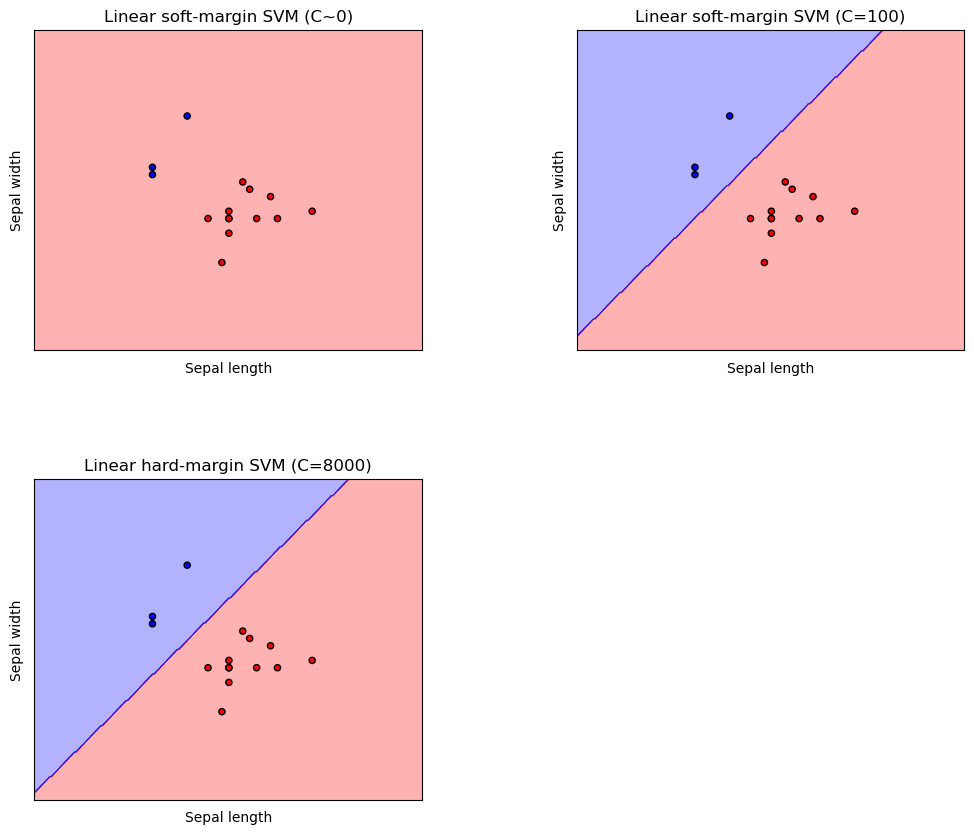

In [53]:
plt.figure(figsize = (12, 10))
for i, model in enumerate((lin_soft_svc, lin_soft_svc_, lin_hard_svc)): 
    # i is the index, and model is one of the three model
    # plot decision boundary
    # assign a color to each point in the mesh 
    # [x_min, m_max]x[y_min, y_max]
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_bold, alpha=0.3)

    # plot training points
    plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=y_test, cmap=cmap_bold, edgecolor = 'k', s=20)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    
    y_predict = model.predict(x_test)
    print('Test Accuracy: %f'%accuracy_score(y_predict, y_test))
plt.show()

In [55]:
# train SVM with different kernels

# create an instance of SVM and fit data
# do not scale data since we want to plot the support vectors

# SVM regularization parameter
C = 1.0 
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(x_train, y_train)

In [57]:
# title for plots
titles = ['SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


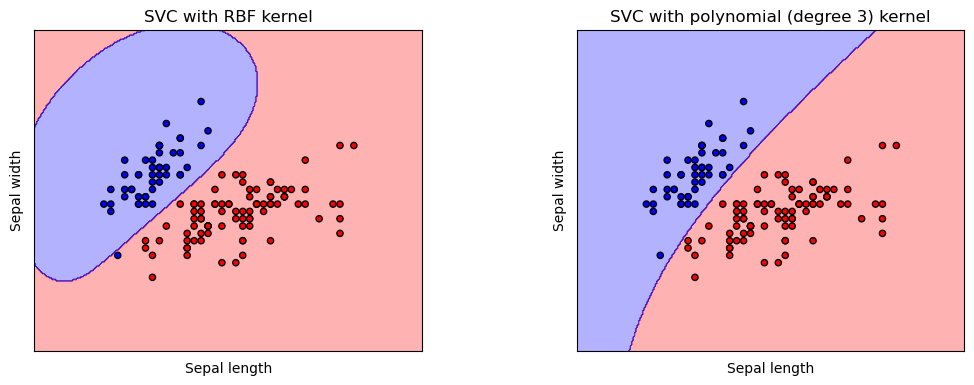

In [59]:
plt.figure(figsize = (12, 10)) 

for i, model in enumerate((rbf_svc, poly_svc)):  
    # i is the index, and model is rbf_svc or poly_svc
    # plot decision boundary
    # assign a color to each point in the mesh 
    # [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # put result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_bold, alpha=0.3)

    # plot training points
    plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, cmap=cmap_bold, edgecolor = 'k', s=20)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [61]:
# predict label by using  '.predict(x)'
y_test_rbf = rbf_svc.predict(x_test)
y_test_poly = poly_svc.predict(x_test)

/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


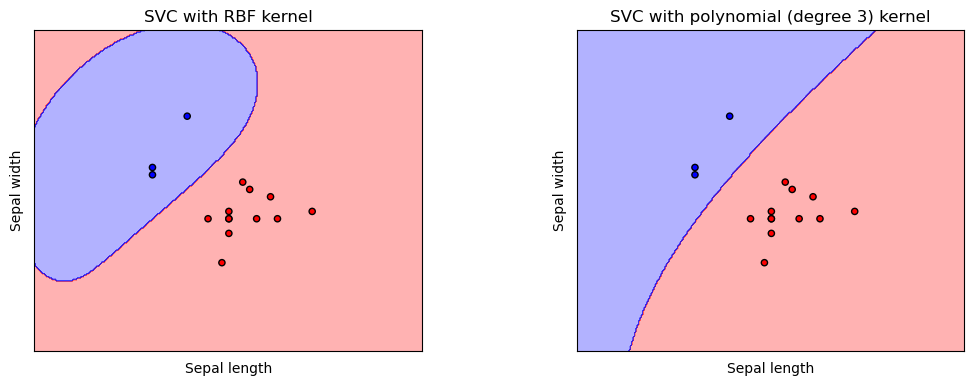

In [63]:
plt.figure(figsize = (12, 10)) 

for i, clf in enumerate((rbf_svc, poly_svc)):
    # plot decision boundary 
    # assign a color to each point in the mesh 
    # [x_min, m_max]x[y_min, y_max]
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # put result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_bold, alpha=0.3)

    # plot training points
    plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=y_test, cmap=cmap_bold, edgecolor = 'k', s=20)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()